In [14]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

#%%
from array import array
from cmath import nan
from pyexpat import model
import statistics
from tkinter.ttk import Separator
import numpy as np
import pandas as pd
import os
from itertools import chain
from sklearn import metrics as met
import pickle
from icecream import ic

import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from importlib import reload
# import util
# import model_torch_simple
# from torchmetrics import Accuracy
from tqdm import tqdm
import argparse
from icecream import ic
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

In [15]:
data = pd.read_csv('./organised_data.csv')

In [3]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [4]:
data = data.drop(columns = ['Not_specified', 'TNF-a antagonists', 'Hepatitis B/C'])

## Na dropout

In [5]:
threshold = 0.7  # Example threshold
data = data.dropna(thresh=len(data) * threshold, axis=1)

In [6]:
data = data.drop(columns = ['condition_id'])

## imputation

In [7]:
data.shape

(12125, 77)

In [8]:
na_counts = data.isna().sum()
print_full(na_counts)

age_of_onset                                          0
gender                                                0
country                                               0
employment                                          730
type_of_resistance                                    0
bmi                                                2992
lung_localization                                     1
overall_percent_of_abnormal_volume                 2959
pleural_effusion_percent_of_hemithorax_involved    2959
ispleuraleffusionbilateral                         2968
other_non_tb_abnormalities                         3013
are_mediastinal_lymphnodes_present                 2985
collapse                                           2963
smallcavities                                      2961
mediumcavities                                     2962
largecavities                                      2964
isanylargecavitybelongtoamultisextantcavity        2959
canmultiplecavitiesbeseen                       

In [9]:
# df_imputed.to_csv('organised_data_mean_imput.csv')


In [10]:
# y = df_imputed[['outcome']]
# X = df_imputed[['age_of_onset', 'gender', 'country', 'employment', 'type_of_resistance',
#        'bmi', 'lung_localization', 'overall_percent_of_abnormal_volume',
#        'pleural_effusion_percent_of_hemithorax_involved',
#        'ispleuraleffusionbilateral', 'other_non_tb_abnormalities',
#        'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities',
#        'mediumcavities', 'largecavities',
#        'isanylargecavitybelongtoamultisextantcavity',
#        'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
#        'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
#        'mediumnodules', 'largenodules', 'hugenodules',
#        'isanycalcifiedorpartiallycalcifiednoduleexist',
#        'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
#        'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
#        'mediumdensitystabalizedfibroticnodules',
#        'highdensitycalcifiedtypicallysequella', 'period_span', 'regimen_count',
#        'Others', 'cytostatics',
#        'Systemically administered glucocorticoids', 'Psychiatric illness',
#        'Pneumoconiosis', 'Anemia', 'Hepatic diseases', 'Renal disease',
#        'Diabetes', 'Post-COVID-19', 'COVID-19', 'HIV',
#        'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
#        'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
#        'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin',
#        'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
#        'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Ofloxacin', 'Pretomanid',
#        'Prothionamide', 'Pyrazinamide', 'Rifampicin', 'Streptomycin',
#        'Terizidone', 'p-aminosalicylic acid', 'Amikacin',
#        'Aminoglycosides - injectible agents']]
df_imputed = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/organised_data_mean_imput.csv')

y = df_imputed[['outcome']]
X = df_imputed[['age_of_onset','gender', 'country', 'employment', 'type_of_resistance',
       'bmi', 'lung_localization', 'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved',
       'ispleuraleffusionbilateral', 'other_non_tb_abnormalities',
       'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'regimen_count',
       'Others', 'cytostatics',
       'Systemically administered glucocorticoids', 'Psychiatric illness',
       'Pneumoconiosis', 'Anemia', 'Hepatic diseases', 'Renal disease',
       'Diabetes', 'Post-COVID-19', 'COVID-19', 'HIV',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Ofloxacin', 'Pretomanid',
       'Prothionamide', 'Pyrazinamide', 'Rifampicin', 'Streptomycin',
       'Terizidone', 'p-aminosalicylic acid', 'Amikacin',
       'Aminoglycosides - injectible agents']]

columns_to_round = ['smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen','infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella']

# Round values in specified columns
df_imputed[columns_to_round] = df_imputed[columns_to_round].round()

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
scaler = MinMaxScaler()

X[['age_of_onset','bmi', 'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'regimen_count'
       ]] = scaler.fit_transform(X[['age_of_onset','bmi', 'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'regimen_count'
       ]])

## Lazyclassifier

In [13]:
y_train

,outcome
1872,1.0
6214,1.0
364,0.0
9643,1.0
10861,0.0
...,...
5159,1.0
11293,2.0
1390,1.0
11403,1.0


In [12]:
X_train

,age_of_onset,gender,country,employment,type_of_resistance,bmi,lung_localization,overall_percent_of_abnormal_volume,pleural_effusion_percent_of_hemithorax_involved,ispleuraleffusionbilateral,...,Ofloxacin,Pretomanid,Prothionamide,Pyrazinamide,Rifampicin,Streptomycin,Terizidone,p-aminosalicylic acid,Amikacin,Aminoglycosides - injectible agents
1872,0.45,1.0,3.0,6.0,0.0,0.16,1.0,1.00,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6214,0.51,1.0,12.0,1.0,3.0,0.10,1.0,1.00,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,0.55,1.0,12.0,6.0,0.0,0.12,1.0,0.50,1.00,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9643,0.50,1.0,12.0,6.0,1.0,0.13,1.0,1.00,1.00,0.00,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10861,0.27,0.0,11.0,6.0,4.0,0.17,1.0,0.00,0.00,0.00,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,0.52,0.0,12.0,2.0,0.0,0.18,1.0,1.00,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11293,0.65,1.0,12.0,6.0,3.0,0.09,1.0,0.91,0.94,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1390,0.36,1.0,3.0,6.0,2.0,0.13,1.0,1.00,1.00,0.00,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11403,0.51,0.0,12.0,6.0,3.0,0.11,1.0,1.00,1.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123, stratify=y)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 10%|█         | 3/29 [00:10<01:31,  3.52s/it]


KeyboardInterrupt: 

## Top model training

In [63]:


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LightGBM classifier
# lgb_clf = lgb.LGBMClassifier()
# lgb_clf.fit(X_train, y_train)
# lgb_predictions = lgb_clf.predict(X_test)
# print(f'LightGBM Accuracy: {accuracy_score(y_test, lgb_predictions)}')

# Train a XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    eta = 0.3,
    gamma =0,
    max_depth = 6,
    max_leaves =0,
    reg_gamma = 0, #
    reg_lambda = 1,
    alpha = 0,
    min_child_weight = 1,
    use_label_encoder=False,
    eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
xgb_predictions = xgb_clf.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions)}')

XGBoost Accuracy: 0.7769072164948454


In [64]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# Assuming X_train, X_test, y_train, y_test have already been defined and split
# Train a LightGBM classifier
lgb_clf.fit(X_train, y_train)
lgb_predictions = lgb_clf.predict(X_test)
print(f'LightGBM Accuracy: {accuracy_score(y_test, lgb_predictions)}')
print(f'LightGBM F1 Score: {f1_score(y_test, lgb_predictions, average="weighted")}')
print(f'LightGBM Confusion Matrix:\n{confusion_matrix(y_test, lgb_predictions)}\n')

# Train a XGBoost classifier
xgb_clf.fit(X_train, y_train)
xgb_predictions = xgb_clf.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions)}')
print(f'XGBoost F1 Score: {f1_score(y_test, xgb_predictions, average="weighted")}')
print(f'XGBoost Confusion Matrix:\n{confusion_matrix(y_test, xgb_predictions)}\n')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 9700, number of used features: 71
[LightGBM] [Info] Start training from score -1.800249
[LightGBM] [Info] Start training from score -0.437626
[LightGBM] [Info] Start training from score -2.236759
[LightGBM] [Info] Start training from score -2.705990
[LightGBM] [Info] Start training from score -4.162601
LightGBM Accuracy: 0.7764948453608247
LightGBM F1 Score: 0.7557086970780634
LightGBM Confusion Matrix:
[[ 238  159    6    2    1]
 [  48 1475   33    8    0]
 [  17  116  111    9    3]
 [   6   99   20   42    0]
 [   1    4    9    1   17]]

XGBoost Accuracy: 0.7769072164948454
XGBoost F1 Score:

## CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

# Load a sample dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base model
lgbm = LGBMClassifier(random_state=42)

# Iteration 1: Broad parameter grid
param_grid_1 = {
    'num_leaves': [70, 80, 90, 100], # 31
    'max_depth': [70, 60, 50], # -1 means no limit
    'learning_rate': [0.07, 0.08, 0.09, 0.1], #0.1
    'n_estimators': [100, 70,60], #100
}

# Perform grid search
grid_search_1 = GridSearchCV(estimator=lgbm, param_grid=param_grid_1, cv=5, scoring='accuracy', verbose=2)
grid_search_1.fit(X_train, y_train)
best_params_1 = grid_search_1.best_params_
print("Best parameters from iteration 1:", best_params_1)
print(f'Best score for LGBMClassifier: {grid_search_1.best_score_}')

In [ ]:

# Use the best parameters from iteration 1 to define a more focused parameter grid for iteration 2
param_grid_2 = {
    'num_leaves': [best_params_1['num_leaves'], best_params_1['num_leaves'] + 64],  # Adjust based on iteration 1
    'max_depth': [best_params_1['max_depth']],
    'learning_rate': [0.05, 0.1],  # Narrow down the learning rate
    'n_estimators': [best_params_1['n_estimators'], best_params_1['n_estimators'] + 100],  # Increase n_estimators
    # You can add more parameters here based on iteration 1 results
}

# Perform grid search for iteration 2
grid_search_2 = GridSearchCV(estimator=lgbm, param_grid=param_grid_2, cv=5, scoring='accuracy', verbose=2)
grid_search_2.fit(X_train, y_train)

# Review the best parameters from iteration 2
best_params_2 = grid_search_2.best_params_
print("Best parameters from iteration 2:", best_params_2)

# Evaluate the model with the best parameters from the final iteration
best_model = grid_search_2.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy of the best model:", test_accuracy)

## xgboost

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

# Assuming X and y are your features and target variable
# Split data into training and testing sets (optional, for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for GridSearchCV
param_grid = {
    'eta': [0.1],
    'gamma': [0],
    'max_depth': [12],
    'reg_lambda': [5],
    'alpha': [2],
    'min_child_weight': [0.4],
    'eval_metric':['mlogloss']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best CV AUC score: {grid_search.best_score_}")

# # You can also evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# # Compute test accuracy or other suitable metrics
# best_params_1 = grid_search_1.best_params_
# print("Best parameters from iteration 1:", best_params_1)
# test_accuracy = accuracy_score(y_test, y_pred) # Uncomment if you want to calculate accuracy
# print(f"Test Accuracy: {test_accuracy}") # Uncomment if you want to print accuracy

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/mnt/storageG1/lwang/miniconda3/envs/ml-g1/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/ml-g1/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:06:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-g1/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old v

Best parameters found: {'alpha': 2, 'eta': 0.1, 'eval_metric': 'mlogloss', 'gamma': 0, 'max_depth': 12, 'min_child_weight': 0.4, 'reg_lambda': 5}
Best CV AUC score: 0.7643298969072164


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', eta= 0.1,
    gamma= 0,
    max_depth= 12,
    reg_lambda= 5,
    alpha= 2,
    min_child_weight= 0.4)
xgb_clf.fit(X_train, y_train)
xgb_predictions = xgb_clf.predict(X_test)
print(f'Xgboost Accuracy: {accuracy_score(y_test, xgb_predictions)}')

Xgboost Accuracy: 0.774020618556701


In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (optional, for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into an XGBoost DMatrix, which is optimized for both memory efficiency and training speed
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the parameter dictionary for the XGBoost model
param = {
    'eta' : 0.3,
    'gamma':0,
    'max_depth' : 6,
    'max_leaves':0,
    'reg_gamma' : 0, #
    'reg_lambda' : 1,
    'alpha' : 0,
    'min_child_weight' : 1,
    'use_label_encoder':False,
    'eval_metric':'mlogloss'    
}

# Number of boosting rounds
num_round = 100

# Perform cross-validation
cv_results = xgb.cv(
    param,
    dtrain,
    num_round,
    nfold=5,  # Number of folds in CV
    metrics={'auc'},  # Evaluation metrics to be watched in CV
    early_stopping_rounds=10  # Stop if no improvement for 10 consecutive rounds
)

# Print CV results
print(cv_results)

# Print the AUC (Area Under the Curve) of the last round
print(f"Best CV AUC score: {cv_results['test-auc-mean'].max()}")

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0             NaN            NaN            NaN           NaN
Best CV AUC score: nan


## lgb

In [9]:
lgb_clf = lgb.LGBMClassifier(learning_rate=0.1, max_depth=-1, n_estimators=100, num_leaves=31)
lgb_clf.fit(X_train, y_train)
lgb_predictions = lgb_clf.predict(X_test)
print(f'LightGBM Accuracy: {accuracy_score(y_test, lgb_predictions)}')

lgb_feature_importances = lgb_clf.feature_importances_
print(f'LightGBM Feature Importances: {lgb_feature_importances}')
# plot_feature_importance(lgb_feature_importances, feature_names, 'LightGBM Feature Importances')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 9700, number of used features: 71
[LightGBM] [Info] Start training from score -1.800249
[LightGBM] [Info] Start training from score -0.437626
[LightGBM] [Info] Start training from score -2.236759
[LightGBM] [Info] Start training from score -2.705990
[LightGBM] [Info] Start training from score -4.162601
LightGBM Accuracy: 0.7760824742268041
LightGBM Feature Importances: [2104  160  700  516  562 2206  175  167   83   55  134  174  117  344
  113  109   80  158  291  383  188  388  425  125   14  164  140  198
  143  370  403  137  373  220   32    0   45    2  166   14   40   82
   19   38  125  112   53  169  153    3  147   48  174  112  120   39
    0    0 

NameError: name 'plot_feature_importance' is not defined

## Feature importance

In [10]:

def plot_feature_importance(importances, feature_names, title):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 17))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [18]:
indices = np.argsort(lgb_feature_importances)
print([feature_names[i] for i in indices])

['Aminoglycosides - injectible agents', 'Mycobutin', 'Gatifloxacin', 'Fluoroquinolones', 'Systemically administered glucocorticoids', 'Pneumoconiosis', 'Clarithromycin', 'hugenodules', 'Hepatic diseases', 'Post-COVID-19', 'Terizidone', 'Ofloxacin', 'Streptomycin', 'cytostatics', 'COVID-19', 'Ethionamide', 'Renal disease', 'Psychiatric illness', 'Cotrimoxazol preventive', 'Antiretroviral therapy', 'ispleuraleffusionbilateral', 'Kanamycin', 'Pretomanid', 'isanylargecavitybelongtoamultisextantcavity', 'Diabetes', 'Imipenem-cilastatin', 'pleural_effusion_percent_of_hemithorax_involved', 'p-aminosalicylic acid', 'Isoniazid', 'Prothionamide', 'largecavities', 'Delamanid', 'Amoxicillin-clavulanate', 'mediumcavities', 'Moxifloxacin', 'collapse', 'Amikacin', 'Ethambutol', 'Linezolid', 'Rifampicin', 'HIV', 'largenodules', 'other_non_tb_abnormalities', 'highdensitycalcifiedtypicallysequella', 'isanynoncalcifiednoduleexist', 'aremultiplenoduleexists', 'Clofazimine', 'Capreomycin', 'canmultiplecavi

LightGBM Feature Importances: [2104  160  700  516  562 2206  175  167   83   55  134  174  117  344
  113  109   80  158  291  383  188  388  425  125   14  164  140  198
  143  370  403  137  373  220   32    0   45    2  166   14   40   82
   19   38  125  112   53  169  153    3  147   48  174  112  120   39
    0    0   82  100   57  174  121  114    0   24   57  109  177  122
   27   21   84  119    0]


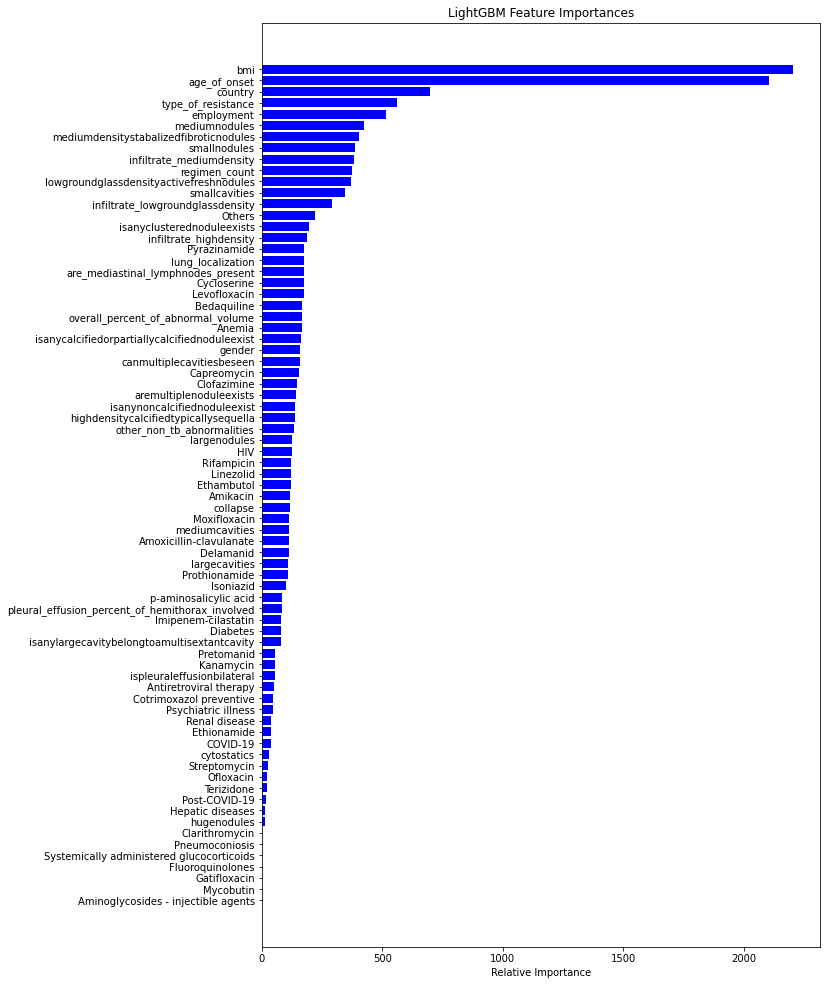

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the feature names are available in a list called feature_names
feature_names = X.columns  # Example, if using a dataset like Iris from sklearn

# Function to plot feature importance

# LightGBM Feature Importance
lgb_feature_importances = lgb_clf.feature_importances_
print(f'LightGBM Feature Importances: {lgb_feature_importances}')
plot_feature_importance(lgb_feature_importances, feature_names, 'LightGBM Feature Importances')


In [20]:
data['Fluoroquinolones'].value_counts()

0    12110
1       15
Name: Fluoroquinolones, dtype: int64

LightGBM Feature Importances: [2104  160  700  516  562 2206  175  167   83   55  134  174  117  344
  113  109   80  158  291  383  188  388  425  125   14  164  140  198
  143  370  403  137  373  220   32    0   45    2  166   14   40   82
   19   38  125  112   53  169  153    3  147   48  174  112  120   39
    0    0   82  100   57  174  121  114    0   24   57  109  177  122
   27   21   84  119    0]


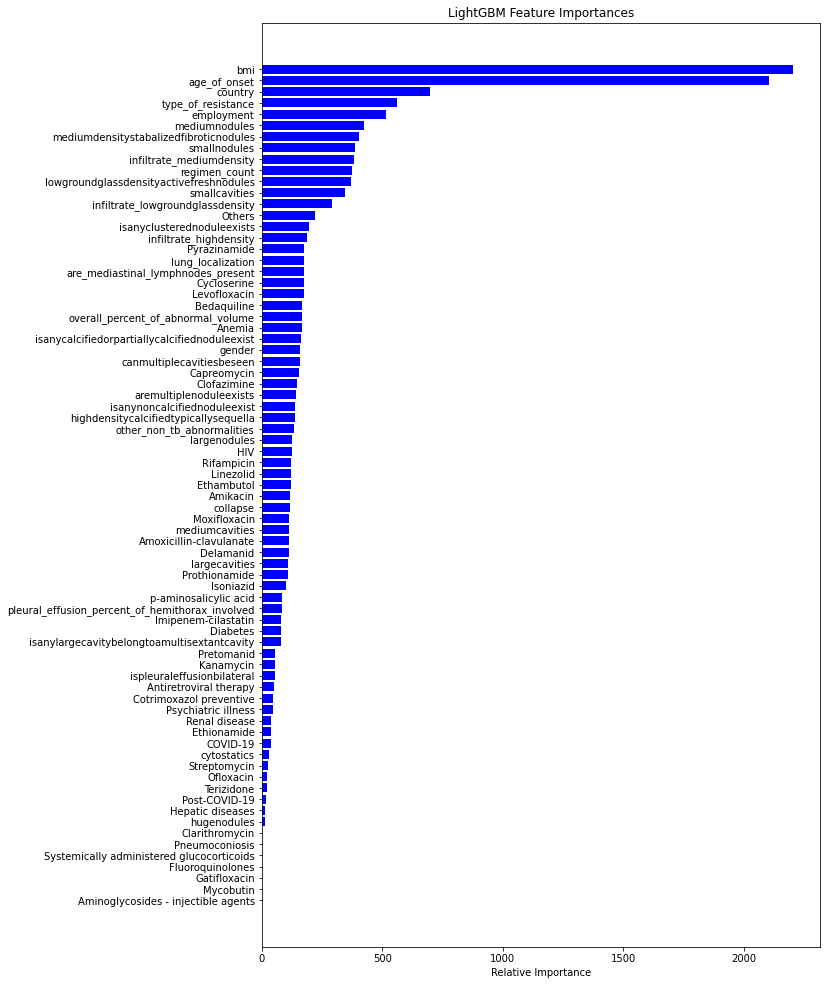

XGBoost Feature Importances: [0.00958864 0.00965007 0.05222328 0.01013089 0.01708551 0.01118856
 0.02578824 0.01565027 0.0222932  0.00866788 0.01055449 0.00973946
 0.00999117 0.00932176 0.01032126 0.00905248 0.01006973 0.0078313
 0.01018421 0.00953892 0.02875568 0.00936575 0.01044214 0.01048585
 0.00591255 0.00753961 0.00725557 0.00887938 0.00871207 0.00980652
 0.012095   0.00998016 0.0179869  0.013802   0.01658133 0.
 0.01367499 0.00809665 0.02682288 0.00727178 0.01011982 0.00750817
 0.00546544 0.0078805  0.01456355 0.01090886 0.00832792 0.02459155
 0.01275365 0.00596109 0.01771018 0.01143045 0.01602625 0.01162524
 0.05769637 0.01095418 0.00362255 0.00613209 0.01427592 0.01205487
 0.00689822 0.01152295 0.02891825 0.01191213 0.         0.00748739
 0.01207553 0.00987669 0.02775664 0.0549152  0.00552879 0.00611216
 0.01788735 0.0083686  0.00879341]


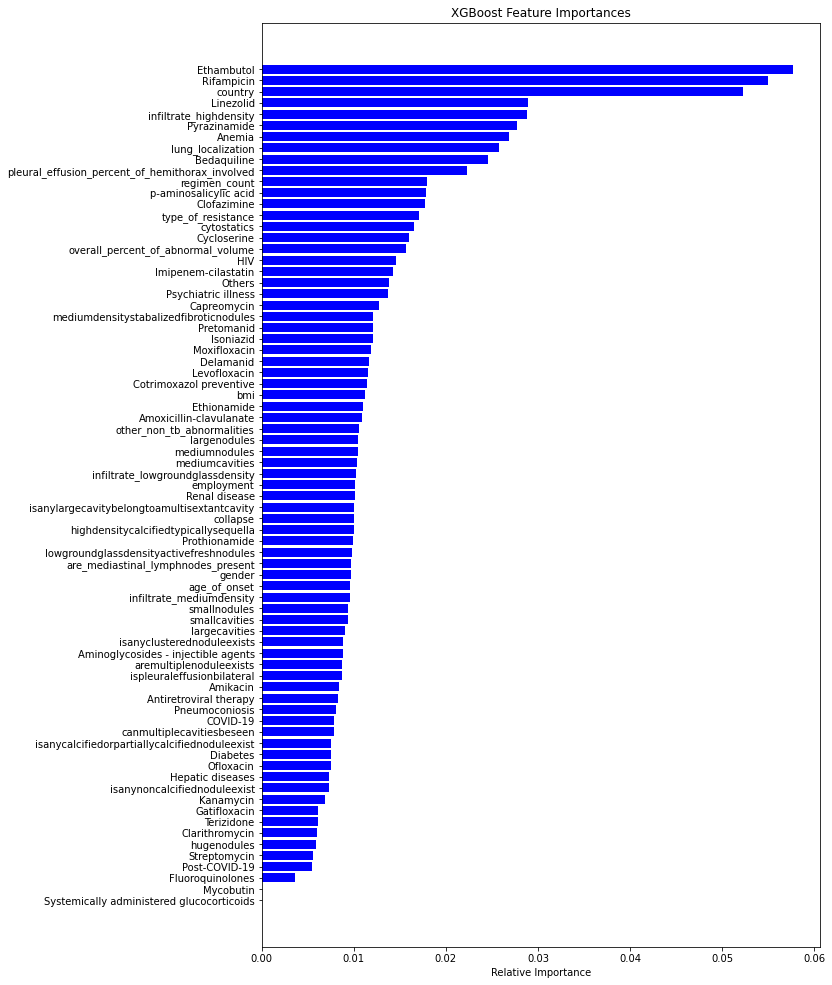

In [11]:

# XGBoost Feature Importance
xgb_feature_importances = xgb_clf.feature_importances_
print(f'XGBoost Feature Importances: {xgb_feature_importances}')
plot_feature_importance(xgb_feature_importances, feature_names, 'XGBoost Feature Importances')

#add shaply value to check which direction of eg. age is affecting the outcome

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=78, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(78)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination with cross-validation
n_features_to_select = 40  # Adjust this number based on your threshold or requirements
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)
rfe = rfe.fit(X_train, y_train)

# Evaluate the model with cross-validation
cv_scores = cross_val_score(rfe, X_train, y_train, cv=5)

# Print the results
print(f"Optimal number of features: {n_features_to_select}")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Train the final model on the selected features
model.fit(X_train[selected_features], y_train)

# Evaluate on the test set
test_score = model.score(X_test[selected_features], y_test)
print(f"Test set score with {n_features_to_select} features: {test_score}")


Optimal number of features: 40
Cross-validation scores: [0.875   0.8875  0.91875 0.9     0.86875]
Mean cross-validation score: 0.89
Test set score with 40 features: 0.885


## RFE feature selection

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Function to evaluate RFE with different numbers of features
def evaluate_rfe(n_features_to_select):
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)
    rfe = rfe.fit(X_train, y_train)
    cv_scores = cross_val_score(rfe, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    selected_features = X_train.columns[rfe.support_]
    model.fit(X_train[selected_features], y_train)
    test_score = model.score(X_test[selected_features], y_test)
    return mean_cv_score, test_score, n_features_to_select, selected_features

# Test different numbers of features
feature_range = range(5, 78, 5)  # Testing from 5 to 75 features in steps of 5
results = []

for n_features in feature_range:
    mean_cv_score, test_score, n_features, selected_features = evaluate_rfe(n_features)
    results.append((n_features, mean_cv_score, test_score))
    print(f"Features: {n_features}, CV Score: {mean_cv_score}, Test Score: {test_score}")

# Find the best number of features based on cross-validation score
best_result = max(results, key=lambda x: x[1])
print(f"\nBest result: Features: {best_result[0]}, CV Score: {best_result[1]}, Test Score: {best_result[2]}")

# Optionally, you can train the final model with the optimal number of features
best_n_features = best_result[0]
_, _, _, selected_features = evaluate_rfe(best_n_features)
model.fit(X_train[selected_features], y_train)
final_test_score = model.score(X_test[selected_features], y_test)
print(f"Final Test set score with {best_n_features} features: {final_test_score}")


Features: 5, CV Score: 0.9087500000000001, Test Score: 0.945
Features: 10, CV Score: 0.90625, Test Score: 0.92
Features: 15, CV Score: 0.89875, Test Score: 0.905
Features: 20, CV Score: 0.8887500000000002, Test Score: 0.875
Features: 25, CV Score: 0.89, Test Score: 0.875
Features: 30, CV Score: 0.88125, Test Score: 0.885
Features: 35, CV Score: 0.8862500000000001, Test Score: 0.89
Features: 40, CV Score: 0.89, Test Score: 0.885
Features: 45, CV Score: 0.8799999999999999, Test Score: 0.86
Features: 50, CV Score: 0.87625, Test Score: 0.88
Features: 55, CV Score: 0.8799999999999999, Test Score: 0.87
Features: 60, CV Score: 0.87375, Test Score: 0.875
Features: 65, CV Score: 0.8775000000000001, Test Score: 0.88
Features: 70, CV Score: 0.875, Test Score: 0.87
Features: 75, CV Score: 0.8800000000000001, Test Score: 0.865

Best result: Features: 5, CV Score: 0.9087500000000001, Test Score: 0.945
Final Test set score with 5 features: 0.945


In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Function to evaluate RFE with different numbers of features
def evaluate_rfe(n_features_to_select):
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)
    rfe = rfe.fit(X_train, y_train)
    cv_scores = cross_val_score(rfe, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    selected_features = X_train.columns[rfe.support_]
    model.fit(X_train[selected_features], y_train)
    test_score = model.score(X_test[selected_features], y_test)
    return mean_cv_score, test_score, n_features_to_select, selected_features

# Test different numbers of features
feature_range = range(5, 78, 5)  # Testing from 5 to 75 features in steps of 5
results = []

for n_features in feature_range:
    mean_cv_score, test_score, n_features, selected_features = evaluate_rfe(n_features)
    results.append((n_features, mean_cv_score, test_score, selected_features))
    print(f"Features: {n_features}, CV Score: {mean_cv_score}, Test Score: {test_score}")
    print(f"Selected Features: {list(selected_features)}")

# Find the best number of features based on cross-validation score
best_result = max(results, key=lambda x: x[1])
print(f"\nBest result: Features: {best_result[0]}, CV Score: {best_result[1]}, Test Score: {best_result[2]}")
print(f"Selected Features: {list(best_result[3])}")

# Optionally, you can train the final model with the optimal number of features
best_n_features = best_result[0]
_, _, _, selected_features = evaluate_rfe(best_n_features)
model.fit(X_train[selected_features], y_train)
final_test_score = model.score(X_test[selected_features], y_test)
print(f"Final Test set score with {best_n_features} features: {final_test_score}")


Features: 5, CV Score: 0.7925773195876289, Test Score: 0.8012371134020618
Selected Features: ['age_of_onset', 'country', 'type_of_resistance', 'bmi', 'period_span']
Features: 10, CV Score: 0.7971134020618557, Test Score: 0.8020618556701031
Selected Features: ['age_of_onset', 'country', 'employment', 'type_of_resistance', 'bmi', 'infiltrate_mediumdensity', 'mediumnodules', 'lowgroundglassdensityactivefreshnodules', 'mediumdensitystabalizedfibroticnodules', 'period_span']
Features: 15, CV Score: 0.7931958762886598, Test Score: 0.7995876288659793
Selected Features: ['age_of_onset', 'country', 'employment', 'type_of_resistance', 'bmi', 'lung_localization', 'smallcavities', 'infiltrate_lowgroundglassdensity', 'infiltrate_mediumdensity', 'smallnodules', 'mediumnodules', 'lowgroundglassdensityactivefreshnodules', 'mediumdensitystabalizedfibroticnodules', 'period_span', 'regimen_count']
Features: 20, CV Score: 0.8012371134020618, Test Score: 0.8144329896907216
Selected Features: ['age_of_onset

In [35]:
'period_span', 'regimen_count', 'Others'

Index(['Unnamed: 0', 'age_of_onset', 'gender', 'country', 'employment',
       'type_of_resistance', 'bmi', 'lung_localization',
       'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved',
       'ispleuraleffusionbilateral', 'other_non_tb_abnormalities',
       'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'period_span', 'regimen_coun

In [36]:
['age_of_onset', 'gender', 'country', 'employment', 'type_of_resistance', 'bmi', 'lung_localization', 'overall_percent_of_abnormal_volume', 'pleural_effusion_percent_of_hemithorax_involved', 'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities', 'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity', 'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules', 'mediumnodules', 'isanycalcifiedorpartiallycalcifiednoduleexist', 'isanynoncalcifiednoduleexist', 'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules', 'mediumdensitystabalizedfibroticnodules', 'period_span', 'regimen_count', 'Others', 'Anemia', 'HIV', 'Amoxicillin-clavulanate', 'Bedaquiline', 'Capreomycin', 'Clofazimine', 'Cycloserine', 'Ethambutol', 'Isoniazid', 'Levofloxacin', 'Linezolid', 'Moxifloxacin', 'Pyrazinamide', 'Rifampicin']


['age_of_onset',
 'gender',
 'country',
 'employment',
 'type_of_resistance',
 'bmi',
 'lung_localization',
 'overall_percent_of_abnormal_volume',
 'pleural_effusion_percent_of_hemithorax_involved',
 'are_mediastinal_lymphnodes_present',
 'collapse',
 'smallcavities',
 'canmultiplecavitiesbeseen',
 'infiltrate_lowgroundglassdensity',
 'infiltrate_mediumdensity',
 'infiltrate_highdensity',
 'smallnodules',
 'mediumnodules',
 'isanycalcifiedorpartiallycalcifiednoduleexist',
 'isanynoncalcifiednoduleexist',
 'aremultiplenoduleexists',
 'lowgroundglassdensityactivefreshnodules',
 'mediumdensitystabalizedfibroticnodules',
 'period_span',
 'regimen_count',
 'Others',
 'Anemia',
 'HIV',
 'Amoxicillin-clavulanate',
 'Bedaquiline',
 'Capreomycin',
 'Clofazimine',
 'Cycloserine',
 'Ethambutol',
 'Isoniazid',
 'Levofloxacin',
 'Linezolid',
 'Moxifloxacin',
 'Pyrazinamide',
 'Rifampicin']